In [11]:
import pandas as pd
from prophet import Prophet
from sklearn.model_selection import TimeSeriesSplit, ParameterGrid
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

In [18]:
# Define parameter grid
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'seasonality_prior_scale': [1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

param_grid1 = {
    'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'seasonality_prior_scale': [1.0, 10.0],
    'holidays_prior_scale': [0.01, 0.1],
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_range': [0.8, 0.9],
    'n_changepoints': [15, 25]
}

param_grid2 = {
    'growth': ['linear', 'logistic', 'flat'],
    'n_changepoints': list(range(0, 55, 10)),  # fewer for speed, tune as needed
    'changepoint_range': [0.5, 0.75, 1.0],  # instead of uniform(0.5, 0.5)
    'yearly_seasonality': [True, False],
    'weekly_seasonality': [True, False],
    'daily_seasonality': [True, False],
    'seasonality_mode': ['additive', 'multiplicative'],
    'seasonality_prior_scale': [5.0, 10.0, 15.0],  # sampled from uniform(5.0, 15.0)
    'changepoint_prior_scale': [0.001, 0.01, 0.1],  # from uniform(0.0, 0.1)
    'interval_width': [0.2, 0.5, 0.8],
    'uncertainty_samples': [500, 1000]
}

grid = list(ParameterGrid(param_grid1))

In [19]:
# TimeSeriesSplit setup
tscv = TimeSeriesSplit(n_splits=3)
best_mape = float("inf")
best_params = None


In [20]:
# Grid search
for params in grid:
    mape_scores = []
    
    for train_index, val_index in tscv.split(df):
        train_df = df.iloc[train_index]
        val_df = df.iloc[val_index]
        
        model = Prophet(
            changepoint_prior_scale=params['changepoint_prior_scale'],
            seasonality_prior_scale=params['seasonality_prior_scale'],
            holidays_prior_scale=params['holidays_prior_scale'],
            seasonality_mode=params['seasonality_mode'],
            changepoint_range=params['changepoint_range'],
            n_changepoints=params['n_changepoints'],
            yearly_seasonality=True,
            weekly_seasonality=False,
            daily_seasonality=False
        )
        model.fit(train_df)
        
        future = model.make_future_dataframe(periods=len(val_df), freq='MS')
        forecast = model.predict(future)
        
        forecast = forecast.set_index('ds').loc[val_df['ds'], 'yhat']
        y_true = val_df.set_index('ds')['y']
        y_pred = forecast
        
        mape = mean_absolute_percentage_error(y_true, y_pred)
        mape_scores.append(mape)
    
    avg_mape = np.mean(mape_scores)
    print(f"Params: {params}, Avg MAPE: {avg_mape:.4f}")
    
    if avg_mape < best_mape:
        best_mape = avg_mape
        best_params = params

# Show best parameters
print("\n✅ Best Params:", best_params)
print("✅ Best Avg MAPE:", best_mape)


12:54:33 - cmdstanpy - INFO - Chain [1] start processing
12:54:33 - cmdstanpy - INFO - Chain [1] done processing
12:54:33 - cmdstanpy - INFO - Chain [1] start processing
12:54:34 - cmdstanpy - INFO - Chain [1] done processing
12:54:34 - cmdstanpy - INFO - Chain [1] start processing
12:54:34 - cmdstanpy - INFO - Chain [1] done processing
12:54:34 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0770


12:54:34 - cmdstanpy - INFO - Chain [1] done processing
12:54:34 - cmdstanpy - INFO - Chain [1] start processing
12:54:35 - cmdstanpy - INFO - Chain [1] done processing
12:54:35 - cmdstanpy - INFO - Chain [1] start processing
12:54:35 - cmdstanpy - INFO - Chain [1] done processing
12:54:35 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0770


12:54:35 - cmdstanpy - INFO - Chain [1] done processing
12:54:35 - cmdstanpy - INFO - Chain [1] start processing
12:54:36 - cmdstanpy - INFO - Chain [1] done processing
12:54:36 - cmdstanpy - INFO - Chain [1] start processing
12:54:36 - cmdstanpy - INFO - Chain [1] done processing
12:54:36 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0732


12:54:36 - cmdstanpy - INFO - Chain [1] done processing
12:54:36 - cmdstanpy - INFO - Chain [1] start processing
12:54:37 - cmdstanpy - INFO - Chain [1] done processing
12:54:37 - cmdstanpy - INFO - Chain [1] start processing
12:54:37 - cmdstanpy - INFO - Chain [1] done processing
12:54:37 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0730


12:54:37 - cmdstanpy - INFO - Chain [1] done processing
12:54:38 - cmdstanpy - INFO - Chain [1] start processing
12:54:38 - cmdstanpy - INFO - Chain [1] done processing
12:54:38 - cmdstanpy - INFO - Chain [1] start processing
12:54:38 - cmdstanpy - INFO - Chain [1] done processing
12:54:38 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0773


12:54:38 - cmdstanpy - INFO - Chain [1] done processing
12:54:38 - cmdstanpy - INFO - Chain [1] start processing
12:54:39 - cmdstanpy - INFO - Chain [1] done processing
12:54:39 - cmdstanpy - INFO - Chain [1] start processing
12:54:39 - cmdstanpy - INFO - Chain [1] done processing
12:54:39 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0774


12:54:39 - cmdstanpy - INFO - Chain [1] done processing
12:54:39 - cmdstanpy - INFO - Chain [1] start processing
12:54:40 - cmdstanpy - INFO - Chain [1] done processing
12:54:40 - cmdstanpy - INFO - Chain [1] start processing
12:54:40 - cmdstanpy - INFO - Chain [1] done processing
12:54:40 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0731


12:54:40 - cmdstanpy - INFO - Chain [1] done processing
12:54:41 - cmdstanpy - INFO - Chain [1] start processing
12:54:41 - cmdstanpy - INFO - Chain [1] done processing
12:54:41 - cmdstanpy - INFO - Chain [1] start processing
12:54:41 - cmdstanpy - INFO - Chain [1] done processing
12:54:41 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0739


12:54:41 - cmdstanpy - INFO - Chain [1] done processing
12:54:41 - cmdstanpy - INFO - Chain [1] start processing
12:54:42 - cmdstanpy - INFO - Chain [1] done processing
12:54:42 - cmdstanpy - INFO - Chain [1] start processing
12:54:42 - cmdstanpy - INFO - Chain [1] done processing
12:54:42 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0770


12:54:42 - cmdstanpy - INFO - Chain [1] done processing
12:54:42 - cmdstanpy - INFO - Chain [1] start processing
12:54:43 - cmdstanpy - INFO - Chain [1] done processing
12:54:43 - cmdstanpy - INFO - Chain [1] start processing
12:54:43 - cmdstanpy - INFO - Chain [1] done processing
12:54:43 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0770


12:54:43 - cmdstanpy - INFO - Chain [1] done processing
12:54:44 - cmdstanpy - INFO - Chain [1] start processing
12:54:44 - cmdstanpy - INFO - Chain [1] done processing
12:54:44 - cmdstanpy - INFO - Chain [1] start processing
12:54:44 - cmdstanpy - INFO - Chain [1] done processing
12:54:44 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0732


12:54:44 - cmdstanpy - INFO - Chain [1] done processing
12:54:45 - cmdstanpy - INFO - Chain [1] start processing
12:54:45 - cmdstanpy - INFO - Chain [1] done processing
12:54:45 - cmdstanpy - INFO - Chain [1] start processing
12:54:45 - cmdstanpy - INFO - Chain [1] done processing
12:54:45 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0730


12:54:46 - cmdstanpy - INFO - Chain [1] done processing
12:54:46 - cmdstanpy - INFO - Chain [1] start processing
12:54:46 - cmdstanpy - INFO - Chain [1] done processing
12:54:46 - cmdstanpy - INFO - Chain [1] start processing
12:54:46 - cmdstanpy - INFO - Chain [1] done processing
12:54:46 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0773


12:54:47 - cmdstanpy - INFO - Chain [1] done processing
12:54:47 - cmdstanpy - INFO - Chain [1] start processing
12:54:47 - cmdstanpy - INFO - Chain [1] done processing
12:54:47 - cmdstanpy - INFO - Chain [1] start processing
12:54:47 - cmdstanpy - INFO - Chain [1] done processing
12:54:47 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0774


12:54:48 - cmdstanpy - INFO - Chain [1] done processing
12:54:48 - cmdstanpy - INFO - Chain [1] start processing
12:54:48 - cmdstanpy - INFO - Chain [1] done processing
12:54:48 - cmdstanpy - INFO - Chain [1] start processing
12:54:48 - cmdstanpy - INFO - Chain [1] done processing
12:54:48 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0731


12:54:49 - cmdstanpy - INFO - Chain [1] done processing
12:54:49 - cmdstanpy - INFO - Chain [1] start processing
12:54:49 - cmdstanpy - INFO - Chain [1] done processing
12:54:49 - cmdstanpy - INFO - Chain [1] start processing
12:54:49 - cmdstanpy - INFO - Chain [1] done processing
12:54:49 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0739


12:54:50 - cmdstanpy - INFO - Chain [1] done processing
12:54:50 - cmdstanpy - INFO - Chain [1] start processing
12:54:50 - cmdstanpy - INFO - Chain [1] done processing
12:54:50 - cmdstanpy - INFO - Chain [1] start processing
12:54:50 - cmdstanpy - INFO - Chain [1] done processing
12:54:50 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0766


12:54:50 - cmdstanpy - INFO - Chain [1] done processing
12:54:51 - cmdstanpy - INFO - Chain [1] start processing
12:54:51 - cmdstanpy - INFO - Chain [1] done processing
12:54:51 - cmdstanpy - INFO - Chain [1] start processing
12:54:51 - cmdstanpy - INFO - Chain [1] done processing
12:54:51 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0768


12:54:52 - cmdstanpy - INFO - Chain [1] done processing
12:54:52 - cmdstanpy - INFO - Chain [1] start processing
12:54:52 - cmdstanpy - INFO - Chain [1] done processing
12:54:52 - cmdstanpy - INFO - Chain [1] start processing
12:54:52 - cmdstanpy - INFO - Chain [1] done processing
12:54:52 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0738


12:54:53 - cmdstanpy - INFO - Chain [1] done processing
12:54:53 - cmdstanpy - INFO - Chain [1] start processing
12:54:53 - cmdstanpy - INFO - Chain [1] done processing
12:54:53 - cmdstanpy - INFO - Chain [1] start processing
12:54:53 - cmdstanpy - INFO - Chain [1] done processing
12:54:53 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0733


12:54:54 - cmdstanpy - INFO - Chain [1] done processing
12:54:54 - cmdstanpy - INFO - Chain [1] start processing
12:54:54 - cmdstanpy - INFO - Chain [1] done processing
12:54:54 - cmdstanpy - INFO - Chain [1] start processing
12:54:54 - cmdstanpy - INFO - Chain [1] done processing
12:54:54 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0771


12:54:55 - cmdstanpy - INFO - Chain [1] done processing
12:54:55 - cmdstanpy - INFO - Chain [1] start processing
12:54:55 - cmdstanpy - INFO - Chain [1] done processing
12:54:55 - cmdstanpy - INFO - Chain [1] start processing
12:54:55 - cmdstanpy - INFO - Chain [1] done processing
12:54:55 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0768


12:54:56 - cmdstanpy - INFO - Chain [1] done processing
12:54:56 - cmdstanpy - INFO - Chain [1] start processing
12:54:56 - cmdstanpy - INFO - Chain [1] done processing
12:54:56 - cmdstanpy - INFO - Chain [1] start processing
12:54:56 - cmdstanpy - INFO - Chain [1] done processing
12:54:56 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0738


12:54:57 - cmdstanpy - INFO - Chain [1] done processing
12:54:57 - cmdstanpy - INFO - Chain [1] start processing
12:54:57 - cmdstanpy - INFO - Chain [1] done processing
12:54:57 - cmdstanpy - INFO - Chain [1] start processing
12:54:57 - cmdstanpy - INFO - Chain [1] done processing
12:54:57 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0733


12:54:58 - cmdstanpy - INFO - Chain [1] done processing
12:54:58 - cmdstanpy - INFO - Chain [1] start processing
12:54:58 - cmdstanpy - INFO - Chain [1] done processing
12:54:58 - cmdstanpy - INFO - Chain [1] start processing
12:54:58 - cmdstanpy - INFO - Chain [1] done processing
12:54:58 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0766


12:54:58 - cmdstanpy - INFO - Chain [1] done processing
12:54:58 - cmdstanpy - INFO - Chain [1] start processing
12:54:59 - cmdstanpy - INFO - Chain [1] done processing
12:54:59 - cmdstanpy - INFO - Chain [1] start processing
12:54:59 - cmdstanpy - INFO - Chain [1] done processing
12:54:59 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0768


12:54:59 - cmdstanpy - INFO - Chain [1] done processing
12:54:59 - cmdstanpy - INFO - Chain [1] start processing
12:55:00 - cmdstanpy - INFO - Chain [1] done processing
12:55:00 - cmdstanpy - INFO - Chain [1] start processing
12:55:00 - cmdstanpy - INFO - Chain [1] done processing
12:55:00 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0738


12:55:00 - cmdstanpy - INFO - Chain [1] done processing
12:55:00 - cmdstanpy - INFO - Chain [1] start processing
12:55:01 - cmdstanpy - INFO - Chain [1] done processing
12:55:01 - cmdstanpy - INFO - Chain [1] start processing
12:55:01 - cmdstanpy - INFO - Chain [1] done processing
12:55:01 - cmdstanpy - INFO - Chain [1] start processing
12:55:01 - cmdstanpy - INFO - Chain [1] done processing


Params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0733


12:55:01 - cmdstanpy - INFO - Chain [1] start processing
12:55:02 - cmdstanpy - INFO - Chain [1] done processing
12:55:02 - cmdstanpy - INFO - Chain [1] start processing
12:55:02 - cmdstanpy - INFO - Chain [1] done processing
12:55:02 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0771


12:55:02 - cmdstanpy - INFO - Chain [1] done processing
12:55:02 - cmdstanpy - INFO - Chain [1] start processing
12:55:02 - cmdstanpy - INFO - Chain [1] done processing
12:55:02 - cmdstanpy - INFO - Chain [1] start processing
12:55:02 - cmdstanpy - INFO - Chain [1] done processing
12:55:03 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0768


12:55:03 - cmdstanpy - INFO - Chain [1] done processing
12:55:03 - cmdstanpy - INFO - Chain [1] start processing
12:55:03 - cmdstanpy - INFO - Chain [1] done processing
12:55:03 - cmdstanpy - INFO - Chain [1] start processing
12:55:03 - cmdstanpy - INFO - Chain [1] done processing
12:55:04 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0738


12:55:04 - cmdstanpy - INFO - Chain [1] done processing
12:55:04 - cmdstanpy - INFO - Chain [1] start processing
12:55:04 - cmdstanpy - INFO - Chain [1] done processing
12:55:04 - cmdstanpy - INFO - Chain [1] start processing
12:55:04 - cmdstanpy - INFO - Chain [1] done processing
12:55:04 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0733


12:55:05 - cmdstanpy - INFO - Chain [1] done processing
12:55:05 - cmdstanpy - INFO - Chain [1] start processing
12:55:05 - cmdstanpy - INFO - Chain [1] done processing
12:55:05 - cmdstanpy - INFO - Chain [1] start processing
12:55:05 - cmdstanpy - INFO - Chain [1] done processing
12:55:05 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0966


12:55:06 - cmdstanpy - INFO - Chain [1] done processing
12:55:06 - cmdstanpy - INFO - Chain [1] start processing
12:55:06 - cmdstanpy - INFO - Chain [1] done processing
12:55:06 - cmdstanpy - INFO - Chain [1] start processing
12:55:06 - cmdstanpy - INFO - Chain [1] done processing
12:55:06 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0966


12:55:07 - cmdstanpy - INFO - Chain [1] done processing
12:55:07 - cmdstanpy - INFO - Chain [1] start processing
12:55:07 - cmdstanpy - INFO - Chain [1] done processing
12:55:07 - cmdstanpy - INFO - Chain [1] start processing
12:55:07 - cmdstanpy - INFO - Chain [1] done processing
12:55:07 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0861


12:55:08 - cmdstanpy - INFO - Chain [1] done processing
12:55:08 - cmdstanpy - INFO - Chain [1] start processing
12:55:08 - cmdstanpy - INFO - Chain [1] done processing
12:55:08 - cmdstanpy - INFO - Chain [1] start processing
12:55:08 - cmdstanpy - INFO - Chain [1] done processing
12:55:08 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0855


12:55:09 - cmdstanpy - INFO - Chain [1] done processing
12:55:09 - cmdstanpy - INFO - Chain [1] start processing
12:55:09 - cmdstanpy - INFO - Chain [1] done processing
12:55:09 - cmdstanpy - INFO - Chain [1] start processing
12:55:09 - cmdstanpy - INFO - Chain [1] done processing
12:55:09 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0987


12:55:10 - cmdstanpy - INFO - Chain [1] done processing
12:55:10 - cmdstanpy - INFO - Chain [1] start processing
12:55:10 - cmdstanpy - INFO - Chain [1] done processing
12:55:10 - cmdstanpy - INFO - Chain [1] start processing
12:55:10 - cmdstanpy - INFO - Chain [1] done processing
12:55:10 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0984


12:55:11 - cmdstanpy - INFO - Chain [1] done processing
12:55:11 - cmdstanpy - INFO - Chain [1] start processing
12:55:11 - cmdstanpy - INFO - Chain [1] done processing
12:55:11 - cmdstanpy - INFO - Chain [1] start processing
12:55:11 - cmdstanpy - INFO - Chain [1] done processing
12:55:11 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0862


12:55:12 - cmdstanpy - INFO - Chain [1] done processing
12:55:12 - cmdstanpy - INFO - Chain [1] start processing
12:55:12 - cmdstanpy - INFO - Chain [1] done processing
12:55:12 - cmdstanpy - INFO - Chain [1] start processing
12:55:12 - cmdstanpy - INFO - Chain [1] done processing
12:55:13 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0866


12:55:13 - cmdstanpy - INFO - Chain [1] done processing
12:55:13 - cmdstanpy - INFO - Chain [1] start processing
12:55:13 - cmdstanpy - INFO - Chain [1] done processing
12:55:13 - cmdstanpy - INFO - Chain [1] start processing
12:55:13 - cmdstanpy - INFO - Chain [1] done processing
12:55:14 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0966


12:55:14 - cmdstanpy - INFO - Chain [1] done processing
12:55:14 - cmdstanpy - INFO - Chain [1] start processing
12:55:14 - cmdstanpy - INFO - Chain [1] done processing
12:55:14 - cmdstanpy - INFO - Chain [1] start processing
12:55:14 - cmdstanpy - INFO - Chain [1] done processing
12:55:14 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0966


12:55:15 - cmdstanpy - INFO - Chain [1] done processing
12:55:15 - cmdstanpy - INFO - Chain [1] start processing
12:55:15 - cmdstanpy - INFO - Chain [1] done processing
12:55:15 - cmdstanpy - INFO - Chain [1] start processing
12:55:15 - cmdstanpy - INFO - Chain [1] done processing
12:55:15 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0861


12:55:16 - cmdstanpy - INFO - Chain [1] done processing
12:55:16 - cmdstanpy - INFO - Chain [1] start processing
12:55:16 - cmdstanpy - INFO - Chain [1] done processing
12:55:16 - cmdstanpy - INFO - Chain [1] start processing
12:55:16 - cmdstanpy - INFO - Chain [1] done processing
12:55:16 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0855


12:55:17 - cmdstanpy - INFO - Chain [1] done processing
12:55:17 - cmdstanpy - INFO - Chain [1] start processing
12:55:17 - cmdstanpy - INFO - Chain [1] done processing
12:55:17 - cmdstanpy - INFO - Chain [1] start processing
12:55:17 - cmdstanpy - INFO - Chain [1] done processing
12:55:17 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0987


12:55:18 - cmdstanpy - INFO - Chain [1] done processing
12:55:18 - cmdstanpy - INFO - Chain [1] start processing
12:55:18 - cmdstanpy - INFO - Chain [1] done processing
12:55:18 - cmdstanpy - INFO - Chain [1] start processing
12:55:18 - cmdstanpy - INFO - Chain [1] done processing
12:55:18 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0984


12:55:19 - cmdstanpy - INFO - Chain [1] done processing
12:55:19 - cmdstanpy - INFO - Chain [1] start processing
12:55:19 - cmdstanpy - INFO - Chain [1] done processing
12:55:19 - cmdstanpy - INFO - Chain [1] start processing
12:55:19 - cmdstanpy - INFO - Chain [1] done processing
12:55:19 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0862


12:55:20 - cmdstanpy - INFO - Chain [1] done processing
12:55:20 - cmdstanpy - INFO - Chain [1] start processing
12:55:20 - cmdstanpy - INFO - Chain [1] done processing
12:55:20 - cmdstanpy - INFO - Chain [1] start processing
12:55:20 - cmdstanpy - INFO - Chain [1] done processing
12:55:20 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0866


12:55:21 - cmdstanpy - INFO - Chain [1] done processing
12:55:21 - cmdstanpy - INFO - Chain [1] start processing
12:55:21 - cmdstanpy - INFO - Chain [1] done processing
12:55:21 - cmdstanpy - INFO - Chain [1] start processing
12:55:21 - cmdstanpy - INFO - Chain [1] done processing
12:55:21 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.1020


12:55:22 - cmdstanpy - INFO - Chain [1] done processing
12:55:22 - cmdstanpy - INFO - Chain [1] start processing
12:55:22 - cmdstanpy - INFO - Chain [1] done processing
12:55:22 - cmdstanpy - INFO - Chain [1] start processing
12:55:22 - cmdstanpy - INFO - Chain [1] done processing
12:55:22 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.1016


12:55:23 - cmdstanpy - INFO - Chain [1] done processing
12:55:23 - cmdstanpy - INFO - Chain [1] start processing
12:55:23 - cmdstanpy - INFO - Chain [1] done processing
12:55:23 - cmdstanpy - INFO - Chain [1] start processing
12:55:23 - cmdstanpy - INFO - Chain [1] done processing
12:55:23 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0664


12:55:24 - cmdstanpy - INFO - Chain [1] done processing
12:55:24 - cmdstanpy - INFO - Chain [1] start processing
12:55:24 - cmdstanpy - INFO - Chain [1] done processing
12:55:24 - cmdstanpy - INFO - Chain [1] start processing
12:55:24 - cmdstanpy - INFO - Chain [1] done processing
12:55:24 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0639


12:55:25 - cmdstanpy - INFO - Chain [1] done processing
12:55:25 - cmdstanpy - INFO - Chain [1] start processing
12:55:25 - cmdstanpy - INFO - Chain [1] done processing
12:55:25 - cmdstanpy - INFO - Chain [1] start processing
12:55:25 - cmdstanpy - INFO - Chain [1] done processing
12:55:25 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0980


12:55:26 - cmdstanpy - INFO - Chain [1] done processing
12:55:26 - cmdstanpy - INFO - Chain [1] start processing
12:55:26 - cmdstanpy - INFO - Chain [1] done processing
12:55:26 - cmdstanpy - INFO - Chain [1] start processing
12:55:26 - cmdstanpy - INFO - Chain [1] done processing
12:55:26 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0989


12:55:26 - cmdstanpy - INFO - Chain [1] done processing
12:55:26 - cmdstanpy - INFO - Chain [1] start processing
12:55:27 - cmdstanpy - INFO - Chain [1] done processing
12:55:27 - cmdstanpy - INFO - Chain [1] start processing
12:55:27 - cmdstanpy - INFO - Chain [1] done processing
12:55:27 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0668


12:55:27 - cmdstanpy - INFO - Chain [1] done processing
12:55:28 - cmdstanpy - INFO - Chain [1] start processing
12:55:28 - cmdstanpy - INFO - Chain [1] done processing
12:55:28 - cmdstanpy - INFO - Chain [1] start processing
12:55:28 - cmdstanpy - INFO - Chain [1] done processing
12:55:28 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0677


12:55:29 - cmdstanpy - INFO - Chain [1] done processing
12:55:29 - cmdstanpy - INFO - Chain [1] start processing
12:55:29 - cmdstanpy - INFO - Chain [1] done processing
12:55:29 - cmdstanpy - INFO - Chain [1] start processing
12:55:29 - cmdstanpy - INFO - Chain [1] done processing
12:55:29 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.1020


12:55:29 - cmdstanpy - INFO - Chain [1] done processing
12:55:29 - cmdstanpy - INFO - Chain [1] start processing
12:55:30 - cmdstanpy - INFO - Chain [1] done processing
12:55:30 - cmdstanpy - INFO - Chain [1] start processing
12:55:30 - cmdstanpy - INFO - Chain [1] done processing
12:55:30 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.1016


12:55:30 - cmdstanpy - INFO - Chain [1] done processing
12:55:30 - cmdstanpy - INFO - Chain [1] start processing
12:55:31 - cmdstanpy - INFO - Chain [1] done processing
12:55:31 - cmdstanpy - INFO - Chain [1] start processing
12:55:31 - cmdstanpy - INFO - Chain [1] done processing
12:55:31 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0664


12:55:31 - cmdstanpy - INFO - Chain [1] done processing
12:55:31 - cmdstanpy - INFO - Chain [1] start processing
12:55:32 - cmdstanpy - INFO - Chain [1] done processing
12:55:32 - cmdstanpy - INFO - Chain [1] start processing
12:55:32 - cmdstanpy - INFO - Chain [1] done processing
12:55:32 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0639


12:55:32 - cmdstanpy - INFO - Chain [1] done processing
12:55:32 - cmdstanpy - INFO - Chain [1] start processing
12:55:33 - cmdstanpy - INFO - Chain [1] done processing
12:55:33 - cmdstanpy - INFO - Chain [1] start processing
12:55:33 - cmdstanpy - INFO - Chain [1] done processing
12:55:33 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0980


12:55:33 - cmdstanpy - INFO - Chain [1] done processing
12:55:33 - cmdstanpy - INFO - Chain [1] start processing
12:55:34 - cmdstanpy - INFO - Chain [1] done processing
12:55:34 - cmdstanpy - INFO - Chain [1] start processing
12:55:34 - cmdstanpy - INFO - Chain [1] done processing
12:55:34 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0989


12:55:34 - cmdstanpy - INFO - Chain [1] done processing
12:55:34 - cmdstanpy - INFO - Chain [1] start processing
12:55:35 - cmdstanpy - INFO - Chain [1] done processing
12:55:35 - cmdstanpy - INFO - Chain [1] start processing
12:55:35 - cmdstanpy - INFO - Chain [1] done processing
12:55:35 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0668


12:55:36 - cmdstanpy - INFO - Chain [1] done processing
12:55:36 - cmdstanpy - INFO - Chain [1] start processing
12:55:36 - cmdstanpy - INFO - Chain [1] done processing
12:55:36 - cmdstanpy - INFO - Chain [1] start processing
12:55:36 - cmdstanpy - INFO - Chain [1] done processing
12:55:36 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0677


12:55:45 - cmdstanpy - INFO - Chain [1] done processing
12:55:45 - cmdstanpy - INFO - Chain [1] start processing
12:55:45 - cmdstanpy - INFO - Chain [1] done processing
12:55:45 - cmdstanpy - INFO - Chain [1] start processing
12:55:45 - cmdstanpy - INFO - Chain [1] done processing
12:55:45 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.5, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.3633


12:55:54 - cmdstanpy - INFO - Chain [1] done processing
12:55:54 - cmdstanpy - INFO - Chain [1] start processing
12:55:55 - cmdstanpy - INFO - Chain [1] done processing
12:55:55 - cmdstanpy - INFO - Chain [1] start processing
12:55:55 - cmdstanpy - INFO - Chain [1] done processing
12:55:55 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.5, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.1974


12:55:55 - cmdstanpy - INFO - Chain [1] done processing
12:55:55 - cmdstanpy - INFO - Chain [1] start processing
12:55:56 - cmdstanpy - INFO - Chain [1] done processing
12:55:56 - cmdstanpy - INFO - Chain [1] start processing
12:55:56 - cmdstanpy - INFO - Chain [1] done processing
12:55:56 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.5, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0807


12:55:56 - cmdstanpy - INFO - Chain [1] done processing
12:55:56 - cmdstanpy - INFO - Chain [1] start processing
12:55:57 - cmdstanpy - INFO - Chain [1] done processing
12:55:57 - cmdstanpy - INFO - Chain [1] start processing
12:55:57 - cmdstanpy - INFO - Chain [1] done processing
12:55:57 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.5, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0812


12:56:10 - cmdstanpy - INFO - Chain [1] done processing
12:56:10 - cmdstanpy - INFO - Chain [1] start processing
12:56:10 - cmdstanpy - INFO - Chain [1] done processing
12:56:10 - cmdstanpy - INFO - Chain [1] start processing
12:56:10 - cmdstanpy - INFO - Chain [1] done processing
12:56:11 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.5, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.1744


12:56:24 - cmdstanpy - INFO - Chain [1] done processing
12:56:24 - cmdstanpy - INFO - Chain [1] start processing
12:56:24 - cmdstanpy - INFO - Chain [1] done processing
12:56:24 - cmdstanpy - INFO - Chain [1] start processing
12:56:24 - cmdstanpy - INFO - Chain [1] done processing
12:56:24 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.5, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.2002


12:56:37 - cmdstanpy - INFO - Chain [1] done processing
12:56:37 - cmdstanpy - INFO - Chain [1] start processing
12:56:37 - cmdstanpy - INFO - Chain [1] done processing
12:56:37 - cmdstanpy - INFO - Chain [1] start processing
12:56:38 - cmdstanpy - INFO - Chain [1] done processing
12:56:38 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.5, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.1287


12:56:51 - cmdstanpy - INFO - Chain [1] done processing
12:56:51 - cmdstanpy - INFO - Chain [1] start processing
12:56:51 - cmdstanpy - INFO - Chain [1] done processing
12:56:52 - cmdstanpy - INFO - Chain [1] start processing
12:56:52 - cmdstanpy - INFO - Chain [1] done processing
12:56:52 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.5, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.1377


12:57:01 - cmdstanpy - INFO - Chain [1] done processing
12:57:01 - cmdstanpy - INFO - Chain [1] start processing
12:57:01 - cmdstanpy - INFO - Chain [1] done processing
12:57:01 - cmdstanpy - INFO - Chain [1] start processing
12:57:01 - cmdstanpy - INFO - Chain [1] done processing
12:57:01 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.5, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.3633


12:57:11 - cmdstanpy - INFO - Chain [1] done processing
12:57:11 - cmdstanpy - INFO - Chain [1] start processing
12:57:11 - cmdstanpy - INFO - Chain [1] done processing
12:57:11 - cmdstanpy - INFO - Chain [1] start processing
12:57:11 - cmdstanpy - INFO - Chain [1] done processing
12:57:11 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.5, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.1974


12:57:12 - cmdstanpy - INFO - Chain [1] done processing
12:57:12 - cmdstanpy - INFO - Chain [1] start processing
12:57:12 - cmdstanpy - INFO - Chain [1] done processing
12:57:12 - cmdstanpy - INFO - Chain [1] start processing
12:57:12 - cmdstanpy - INFO - Chain [1] done processing
12:57:12 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.5, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0807


12:57:13 - cmdstanpy - INFO - Chain [1] done processing
12:57:13 - cmdstanpy - INFO - Chain [1] start processing
12:57:13 - cmdstanpy - INFO - Chain [1] done processing
12:57:13 - cmdstanpy - INFO - Chain [1] start processing
12:57:13 - cmdstanpy - INFO - Chain [1] done processing
12:57:13 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.5, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0812


12:57:26 - cmdstanpy - INFO - Chain [1] done processing
12:57:26 - cmdstanpy - INFO - Chain [1] start processing
12:57:26 - cmdstanpy - INFO - Chain [1] done processing
12:57:27 - cmdstanpy - INFO - Chain [1] start processing
12:57:27 - cmdstanpy - INFO - Chain [1] done processing
12:57:27 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.5, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.1744


12:57:40 - cmdstanpy - INFO - Chain [1] done processing
12:57:40 - cmdstanpy - INFO - Chain [1] start processing
12:57:41 - cmdstanpy - INFO - Chain [1] done processing
12:57:41 - cmdstanpy - INFO - Chain [1] start processing
12:57:41 - cmdstanpy - INFO - Chain [1] done processing
12:57:41 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.5, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.2002


12:57:53 - cmdstanpy - INFO - Chain [1] done processing
12:57:53 - cmdstanpy - INFO - Chain [1] start processing
12:57:53 - cmdstanpy - INFO - Chain [1] done processing
12:57:53 - cmdstanpy - INFO - Chain [1] start processing
12:57:53 - cmdstanpy - INFO - Chain [1] done processing
12:57:54 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.5, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.1287


12:58:06 - cmdstanpy - INFO - Chain [1] done processing
12:58:06 - cmdstanpy - INFO - Chain [1] start processing
12:58:06 - cmdstanpy - INFO - Chain [1] done processing
12:58:06 - cmdstanpy - INFO - Chain [1] start processing
12:58:06 - cmdstanpy - INFO - Chain [1] done processing
12:58:07 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.5, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.1377


12:58:07 - cmdstanpy - INFO - Chain [1] done processing
12:58:07 - cmdstanpy - INFO - Chain [1] start processing
12:58:07 - cmdstanpy - INFO - Chain [1] done processing
12:58:07 - cmdstanpy - INFO - Chain [1] start processing
12:58:07 - cmdstanpy - INFO - Chain [1] done processing
12:58:08 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0972


12:58:08 - cmdstanpy - INFO - Chain [1] done processing
12:58:08 - cmdstanpy - INFO - Chain [1] start processing
12:58:08 - cmdstanpy - INFO - Chain [1] done processing
12:58:08 - cmdstanpy - INFO - Chain [1] start processing
12:58:08 - cmdstanpy - INFO - Chain [1] done processing
12:58:09 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0719


12:58:09 - cmdstanpy - INFO - Chain [1] done processing
12:58:09 - cmdstanpy - INFO - Chain [1] start processing
12:58:09 - cmdstanpy - INFO - Chain [1] done processing
12:58:09 - cmdstanpy - INFO - Chain [1] start processing
12:58:10 - cmdstanpy - INFO - Chain [1] done processing
12:58:10 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.1065


12:58:10 - cmdstanpy - INFO - Chain [1] done processing
12:58:10 - cmdstanpy - INFO - Chain [1] start processing
12:58:10 - cmdstanpy - INFO - Chain [1] done processing
12:58:11 - cmdstanpy - INFO - Chain [1] start processing
12:58:11 - cmdstanpy - INFO - Chain [1] done processing
12:58:11 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0606


12:58:22 - cmdstanpy - INFO - Chain [1] done processing
12:58:22 - cmdstanpy - INFO - Chain [1] start processing
12:58:22 - cmdstanpy - INFO - Chain [1] done processing
12:58:22 - cmdstanpy - INFO - Chain [1] start processing
12:58:22 - cmdstanpy - INFO - Chain [1] done processing
12:58:23 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.2904


12:58:35 - cmdstanpy - INFO - Chain [1] done processing
12:58:35 - cmdstanpy - INFO - Chain [1] start processing
12:58:36 - cmdstanpy - INFO - Chain [1] done processing
12:58:36 - cmdstanpy - INFO - Chain [1] start processing
12:58:36 - cmdstanpy - INFO - Chain [1] done processing
12:58:36 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.1158


12:58:49 - cmdstanpy - INFO - Chain [1] done processing
12:58:49 - cmdstanpy - INFO - Chain [1] start processing
12:58:49 - cmdstanpy - INFO - Chain [1] done processing
12:58:49 - cmdstanpy - INFO - Chain [1] start processing
12:58:49 - cmdstanpy - INFO - Chain [1] done processing
12:58:50 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0770


12:59:02 - cmdstanpy - INFO - Chain [1] done processing
12:59:02 - cmdstanpy - INFO - Chain [1] start processing
12:59:03 - cmdstanpy - INFO - Chain [1] done processing
12:59:03 - cmdstanpy - INFO - Chain [1] start processing
12:59:03 - cmdstanpy - INFO - Chain [1] done processing
12:59:03 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0546


12:59:04 - cmdstanpy - INFO - Chain [1] done processing
12:59:04 - cmdstanpy - INFO - Chain [1] start processing
12:59:04 - cmdstanpy - INFO - Chain [1] done processing
12:59:04 - cmdstanpy - INFO - Chain [1] start processing
12:59:04 - cmdstanpy - INFO - Chain [1] done processing
12:59:04 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0972


12:59:05 - cmdstanpy - INFO - Chain [1] done processing
12:59:05 - cmdstanpy - INFO - Chain [1] start processing
12:59:05 - cmdstanpy - INFO - Chain [1] done processing
12:59:05 - cmdstanpy - INFO - Chain [1] start processing
12:59:05 - cmdstanpy - INFO - Chain [1] done processing
12:59:05 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 15, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0719


12:59:05 - cmdstanpy - INFO - Chain [1] done processing
12:59:06 - cmdstanpy - INFO - Chain [1] start processing
12:59:06 - cmdstanpy - INFO - Chain [1] done processing
12:59:06 - cmdstanpy - INFO - Chain [1] start processing
12:59:06 - cmdstanpy - INFO - Chain [1] done processing
12:59:06 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.1065


12:59:07 - cmdstanpy - INFO - Chain [1] done processing
12:59:07 - cmdstanpy - INFO - Chain [1] start processing
12:59:07 - cmdstanpy - INFO - Chain [1] done processing
12:59:07 - cmdstanpy - INFO - Chain [1] start processing
12:59:07 - cmdstanpy - INFO - Chain [1] done processing
12:59:07 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 15, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0606


12:59:19 - cmdstanpy - INFO - Chain [1] done processing
12:59:19 - cmdstanpy - INFO - Chain [1] start processing
12:59:20 - cmdstanpy - INFO - Chain [1] done processing
12:59:20 - cmdstanpy - INFO - Chain [1] start processing
12:59:20 - cmdstanpy - INFO - Chain [1] done processing
12:59:20 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.2904


12:59:32 - cmdstanpy - INFO - Chain [1] done processing
12:59:32 - cmdstanpy - INFO - Chain [1] start processing
12:59:32 - cmdstanpy - INFO - Chain [1] done processing
12:59:32 - cmdstanpy - INFO - Chain [1] start processing
12:59:33 - cmdstanpy - INFO - Chain [1] done processing
12:59:33 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.1158


12:59:45 - cmdstanpy - INFO - Chain [1] done processing
12:59:45 - cmdstanpy - INFO - Chain [1] start processing
12:59:45 - cmdstanpy - INFO - Chain [1] done processing
12:59:45 - cmdstanpy - INFO - Chain [1] start processing
12:59:46 - cmdstanpy - INFO - Chain [1] done processing
12:59:46 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0770


12:59:58 - cmdstanpy - INFO - Chain [1] done processing
12:59:58 - cmdstanpy - INFO - Chain [1] start processing
12:59:58 - cmdstanpy - INFO - Chain [1] done processing
12:59:58 - cmdstanpy - INFO - Chain [1] start processing
12:59:58 - cmdstanpy - INFO - Chain [1] done processing


Params: {'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0546

✅ Best Params: {'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}
✅ Best Avg MAPE: 0.054575673048610975


In [21]:
# Train final model on full data with best params
final_model = Prophet(
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale'],
    holidays_prior_scale=best_params['holidays_prior_scale'],
    seasonality_mode=best_params['seasonality_mode'],
    changepoint_range=best_params['changepoint_range'],
    n_changepoints=best_params['n_changepoints'],
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)
final_model.fit(df)

12:59:59 - cmdstanpy - INFO - Chain [1] start processing
12:59:59 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
# Forecast future
future = final_model.make_future_dataframe(periods=12, freq='MS')
forecast = final_model.predict(future)

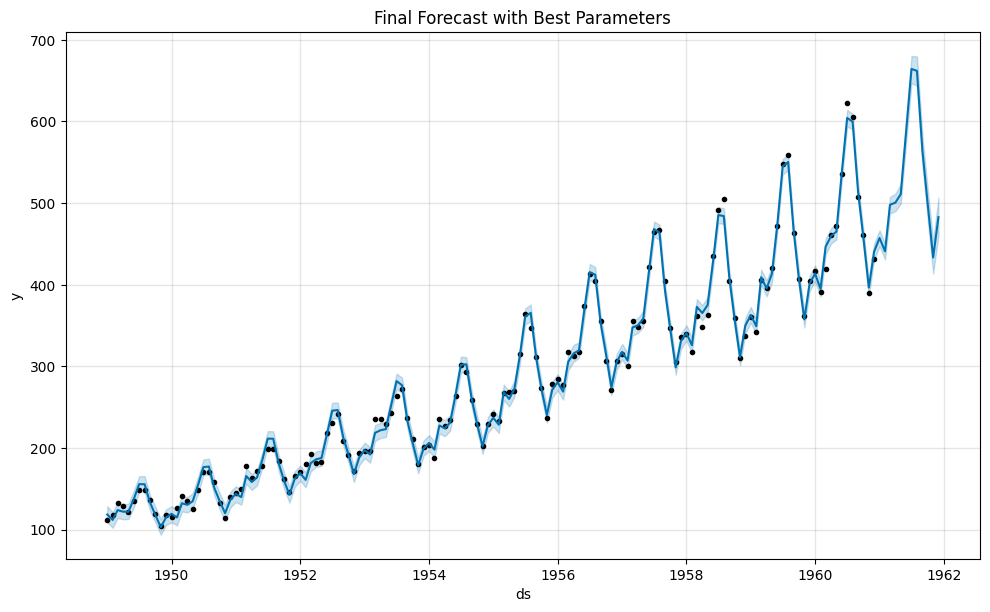

In [23]:
# Plot results
final_model.plot(forecast)
plt.title('Final Forecast with Best Parameters')
plt.show()